In [612]:
# === Loading Packages ===
using Sunny # The main package
using ProgressMeter  #Statistics, Formatting, StaticArrays, LinearAlgebra, DelimitedFiles, OffsetArrays, Random # Some useful peripheral packages
using GLMakie, Plots # Some useful plotting packages
using Statistics, Formatting, StaticArrays, LinearAlgebra, DelimitedFiles, OffsetArrays, JLD2, Random
Sunny.offline_viewers();

In [613]:
# === Define the crystal structure of BNZS by importing a cif file === 
xtal_BNZS = Crystal("BNZS_maddy.cif",symprec=0.001)
#display(xtal_BNZS);

Crystal
HM symbol 'P 4/m c c' (124)
Lattice params a=15.68, b=15.68, c=13.61, α=90°, β=90°, γ=90°
Cell volume 3346
Type 'Ba1_1', Wyckoff 2a (point group '422'):
   1. [0, 0, 0.25]
   2. [0.5, 0, 0.25]
   3. [0, 0.5, 0.25]
   4. [0.5, 0.5, 0.25]
   5. [0, 0, 0.75]
   6. [0.5, 0, 0.75]
   7. [0, 0.5, 0.75]
   8. [0.5, 0.5, 0.75]
Type 'Ba1_2', Wyckoff 2c (point group '422'):
   9. [0.25, 0.25, 0.25]
   10. [0.75, 0.25, 0.25]
   11. [0.25, 0.75, 0.25]
   12. [0.75, 0.75, 0.25]
   13. [0.25, 0.25, 0.75]
   14. [0.75, 0.25, 0.75]
   15. [0.25, 0.75, 0.75]
   16. [0.75, 0.75, 0.75]
Type 'Nd1', Wyckoff 8m (point group 'm..'):
   17. [0.1708, 0.0792, 0]
   18. [0.6709, 0.0792, 0]
   19. [0.4208, 0.1708, 0]
   20. [0.9208, 0.1708, 0]
   21. [0.0792, 0.3292, 0]
   22. [0.5792, 0.3292, 0]
   23. [0.3292, 0.4208, 0]
   24. [0.8292, 0.4208, 0]
   25. [0.1708, 0.5792, 0]
   26. [0.6709, 0.5792, 0]
   27. [0.4208, 0.6709, 0]
   28. [0.9208, 0.6709, 0]
   29. [0.0792, 0.8292, 0]
   30. [0.5792, 0.8292,

In [614]:
xtal_Nd=subcrystal(xtal_BNZS, "Nd1",)

Crystal
HM symbol 'P 4/m c c' (124)
Lattice params a=15.68, b=15.68, c=13.61, α=90°, β=90°, γ=90°
Cell volume 3346
Type 'Nd1', Wyckoff 8m (point group 'm..'):
   1. [0.1708, 0.0792, 0]
   2. [0.6709, 0.0792, 0]
   3. [0.4208, 0.1708, 0]
   4. [0.9208, 0.1708, 0]
   5. [0.0792, 0.3292, 0]
   6. [0.5792, 0.3292, 0]
   7. [0.3292, 0.4208, 0]
   8. [0.8292, 0.4208, 0]
   9. [0.1708, 0.5792, 0]
   10. [0.6709, 0.5792, 0]
   11. [0.4208, 0.6709, 0]
   12. [0.9208, 0.6709, 0]
   13. [0.0792, 0.8292, 0]
   14. [0.5792, 0.8292, 0]
   15. [0.3292, 0.9208, 0]
   16. [0.8292, 0.9208, 0]
   17. [0.3292, 0.0792, 0.5]
   18. [0.8292, 0.0792, 0.5]
   19. [0.0792, 0.1708, 0.5]
   20. [0.5792, 0.1708, 0.5]
   21. [0.4208, 0.3292, 0.5]
   22. [0.9208, 0.3292, 0.5]
   23. [0.1708, 0.4208, 0.5]
   24. [0.6709, 0.4208, 0.5]
   25. [0.3292, 0.5792, 0.5]
   26. [0.8292, 0.5792, 0.5]
   27. [0.0792, 0.6709, 0.5]
   28. [0.5792, 0.6709, 0.5]
   29. [0.4208, 0.8292, 0.5]
   30. [0.9208, 0.8292, 0.5]
   31. [0.17

In [615]:
# display("======== BNZS Exchange Interactions to unknown Neighbor ========")
print_symmetry_table(xtal_Nd,7.5); # Print g-factor of Cr site and exchange interactions to distance of 6.0Å

Atom 1
Type 'Nd1', position [0.1708, 0.0792, 0], multiplicity 32
Allowed g-tensor: |   A  D+E    0 |
                  | D-E    B    0 |
                  |   0    0    C |
Allowed anisotropy in Stevens operators 𝒪[k,q]:
    c₁*𝒪[2,-2] + c₂*𝒪[2,0] + c₃*𝒪[2,2] +
    c₄*𝒪[4,-4] + c₅*𝒪[4,-2] + c₆*𝒪[4,0] + c₇*𝒪[4,2] + c₈*𝒪[4,4] +
    c₉*𝒪[6,-6] + c₁₀*𝒪[6,-4] + c₁₁*𝒪[6,-2] + c₁₂*𝒪[6,0] + c₁₃*𝒪[6,2] + c₁₄*𝒪[6,4] + c₁₅*𝒪[6,6]

Bond(3, 6, [0, 0, 0])
Distance 3.5100130645547, coordination 1
Connects 'Nd1' at [0.4208, 0.1708, 0] to 'Nd1' at [0.5792, 0.3292, 0]
Allowed exchange matrix: | A  D  0 |
                         | D  B  0 |
                         | 0  0  C |

Bond(2, 3, [0, 0, 0])
Distance 4.1750642552536, coordination 2
Connects 'Nd1' at [0.6709, 0.0792, 0] to 'Nd1' at [0.4208, 0.1708, 0]
Allowed exchange matrix: |   A  D+E    0 |
                         | D-E    B    0 |
                         |   0    0    C |
Allowed DM vector: [0 0 E]

Bond(1, 3, [0, 0, 0])
Distance 4.17506425

In [616]:
L = 1
k = 1
gtensorplus=[0.85 -3.68 0;0.85 3.68 0; 0 0 0.0] #parallel to field
gtensorminus=[0.85 3.68 0;-0.85 3.68 0; 0 0 0.0] #perp to field
gtensor=[0 -5.2 0;1.2 0 0; 0 0 0]

sys = System(xtal_Nd, (L,L,k), [SpinInfo(1, S=1/2)], :SUN, units=Units.meV, seed=2)
# enable_dipole_dipole!(sys)

System [SU(2)]
Cell size 32, Lattice size (1, 1, 1)


In [617]:
set_exchange!(sys,-0.9, Bond(3, 6, [0, 0, 0]))
    
set_exchange!(sys,1.8, Bond(6, 11, [0, 0, 0]))

# set_exchange!(sys, 1.2, Bond(3, 5, [0, 0, 0])) #AF interactions
# set_exchange!(sys, 1.2, Bond(7, 10, [0, 0, 0])) #AF interactions
    
# set_exchange!(sys, -0.1, Bond(1, 19, [0, 0, 0])) 

In [618]:
set_anisotropy!(sys, 5*(𝒮[1]^2+𝒮[2]^2), 3)
# set_anisotropy!(sys, 4*(𝒮[1]^2+𝒮[2]^2), 14)

In [619]:
# print_bond(xtal_Nd, Bond(7, 6, [0, 0, 0]); b_ref=Bond(2,3,[0,0,0]));
# print_bond(xtal_Nd, Bond(3, 6, [0, 0, 0]));

In [620]:
for i in range(start = 1, stop=L, step=1)
    for j in range(start = 1, stop=L, step=1)
        for k in range(start = 1, stop=k, step=1)
            polarize_spin!(sys,(-1,1,0),(i,j,k,3))
            polarize_spin!(sys,(-1,1,0),(i,j,k,6))
            polarize_spin!(sys,(-1,1,0),(i,j,k,12))
            polarize_spin!(sys,(-1,1,0),(i,j,k,13))
                        
            polarize_spin!(sys,(1,-1,0),(i,j,k,4))
            polarize_spin!(sys,(1,-1,0),(i,j,k,5))
            polarize_spin!(sys,(1,-1,0),(i,j,k,11))
            polarize_spin!(sys,(1,-1,0),(i,j,k,14))
#Layer2

        end
    end
end

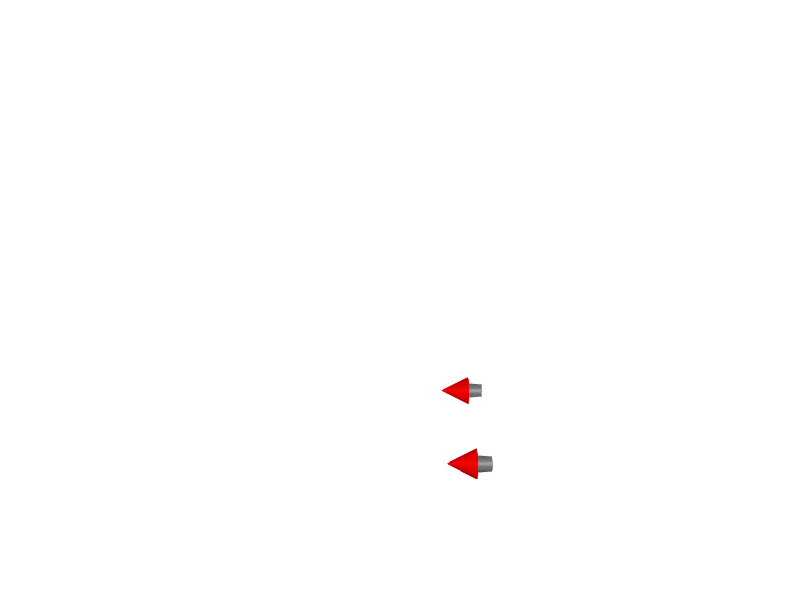

In [621]:
sys=to_inhomogeneous(sys)
for i in range(start = 1, stop=L, step=1)
    for j in range(start = 1, stop=L, step=1)
        for k in range(start = 1, stop=k, step=1)
              set_vacancy_at!(sys,(i,j,k,1))
              set_vacancy_at!(sys,(i,j,k,2))
              set_vacancy_at!(sys,(i,j,k,3))
              set_vacancy_at!(sys,(i,j,k,4))
              set_vacancy_at!(sys,(i,j,k,5))
              set_vacancy_at!(sys,(i,j,k,6))
              set_vacancy_at!(sys,(i,j,k,7))
              set_vacancy_at!(sys,(i,j,k,8))
              set_vacancy_at!(sys,(i,j,k,9))
              set_vacancy_at!(sys,(i,j,k,10))
#               set_vacancy_at!(sys,(i,j,k,11))
              set_vacancy_at!(sys,(i,j,k,12))
              set_vacancy_at!(sys,(i,j,k,13))
#                set_vacancy_at!(sys,(i,j,k,14))
              set_vacancy_at!(sys,(i,j,k,15))
              set_vacancy_at!(sys,(i,j,k,16))
                        
            set_vacancy_at!(sys,(i,j,k,18)) 
            set_vacancy_at!(sys,(i,j,k,19))
            set_vacancy_at!(sys,(i,j,k,20))
            set_vacancy_at!(sys,(i,j,k,21))
            set_vacancy_at!(sys,(i,j,k,22))
            set_vacancy_at!(sys,(i,j,k,23))
            set_vacancy_at!(sys,(i,j,k,25))
            set_vacancy_at!(sys,(i,j,k,27))
            set_vacancy_at!(sys,(i,j,k,28))
            set_vacancy_at!(sys,(i,j,k,29))
            set_vacancy_at!(sys,(i,j,k,30))
           set_vacancy_at!(sys,(i,j,k,32))
           set_vacancy_at!(sys,(i,j,k,17))
           set_vacancy_at!(sys,(i,j,k,24))
          set_vacancy_at!(sys,(i,j,k,26))
           set_vacancy_at!(sys,(i,j,k,31))
        end
    end
end

plot_spins(sys,arrowlength=1, linewidth=0.5, arrowsize=1.0)

In [622]:
B=0
set_external_field!(sys, (sqrt(B), -sqrt(B),0))

In [623]:
Δt = 0.01
λ = 0.1        # Dimensionless magnitude of coupling to thermal bath
langevin = Langevin(Δt; kT=0, λ);
randomize_spins!(sys)

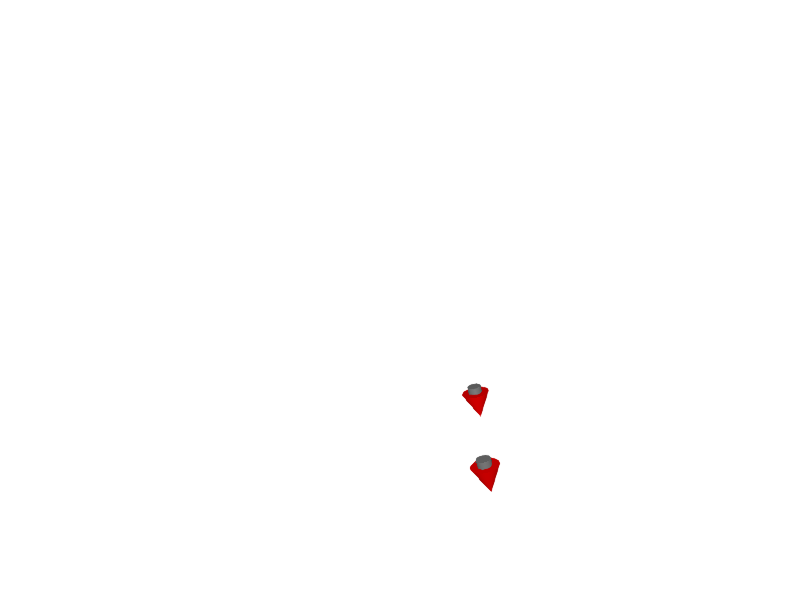

In [624]:
for kT in range(1, 0, 100_000)
    langevin.kT = kT
    step!(sys, langevin)
end
plot_spins(sys,arrowlength=0.5, linewidth=0.5, arrowsize=1.0)

In [625]:
# Make a `StructureFactor` and calculate an initial sample
sf = DynamicStructureFactor(sys; Δt=0.05, ωmax=3.0, nω=100);

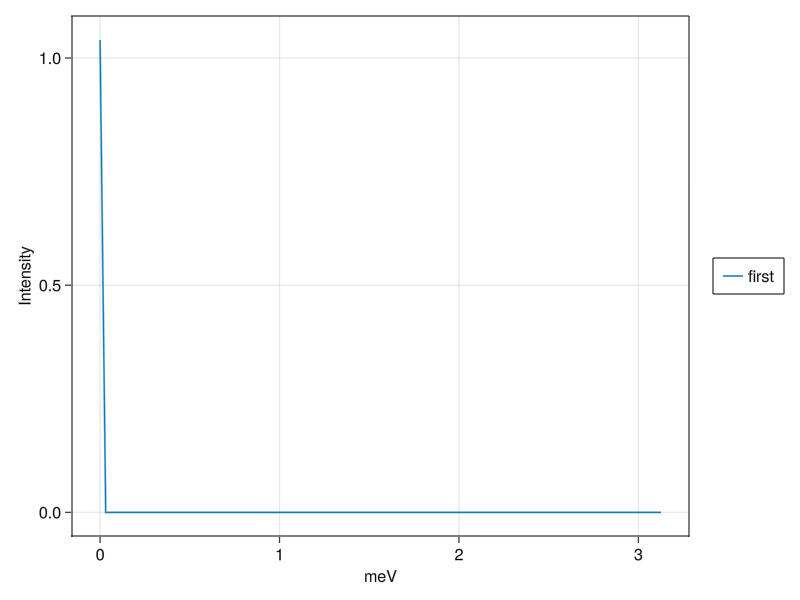

In [626]:
qs = [ [1, 1, 0]]
is = intensities(sf, qs, :perp)

fig = Figure()
ax = Axis(fig[1,1]; xlabel="meV", ylabel="Intensity")
l1 = lines!(ax, ωs(sf), is[1,:])
Legend(fig[1,2], [l1], ["first"])
fig

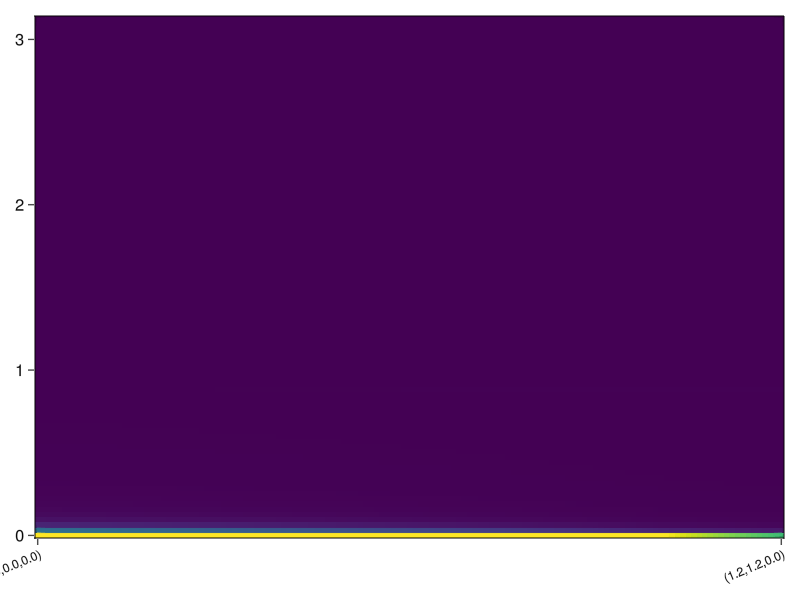

In [627]:
kT=0.025
points = [[0,   0, 0],  # List of wave vectors that define a path
          [1.2,   1.2, 0],]
density = 80
path, markers = connected_path(points, density);

formfactors = [FormFactor(1, "Nd3"; g_lande=0.78)]
is = intensities(sf, path, :perp;
    interpolation = :linear,       # Interpolate between available wave vectors
    kT,                            # Temperature for intensity correction
    formfactors,                   # Form factor information
)
is = broaden_energy(sf, is, (ω, ω₀)->lorentzian(ω-ω₀, 0.01))  # Add artificial broadening

labels = ["($(p[1]),$(p[2]),$(p[3]))" for p in points]

GLMakie.heatmap(1:size(is,1), ωs(sf), is;
    colorrange=(0, 1),
    axis = (
#         ylabel = "meV",
        xticks = (markers, labels),
        xticklabelrotation=π/8,
        xticklabelsize=12,
    )
)